In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [26]:
df=pd.read_csv(r"C:\Users\LENOVO\Downloads\GBcomments.csv",error_bad_lines=False)
# To avoid ParserError use error_bad_lines

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [ ]:
df.head()

In [11]:
#!pip install textblob

In [27]:
from textblob import TextBlob

In [28]:
TextBlob("It's more accurate to call it the M+ (1000) be..").sentiment.polarity

0.45000000000000007

In [29]:
df.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [30]:
df.dropna(inplace=True)

In [31]:
polarity=[]

for i in df["comment_text"]:
    value=TextBlob(i).sentiment.polarity
    polarity.append(value)

In [32]:
df["polarity"]=polarity

In [25]:
df.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

In [26]:
#!pip install wordcloud 

In [33]:
positive_df=df[df["polarity"]==1]

In [38]:
positive_df.head()

video_id                                       comment_text  likes  \
4    jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26   jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80   jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158  YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175  YPVcg45W0z4                        Welcome to the Scandiworld!      0   

     replies  polarity  
4          0       1.0  
26         2       1.0  
80         1       1.0  
158        0       1.0  
175        0       1.0

In [47]:
negative_df=df[df["polarity"]==-1]

In [49]:
negative_df.head()

video_id                                       comment_text  likes  \
1387  ql0Op1VcELw                                             boring      0   
1394  ql0Op1VcELw                  0:22   **laughs at terrible pun**      1   
1530  -Ifnaxi2LQg          this is the worst thing i've heard. ever.      0   
1745  F2uJvwiSZAQ  People making jokes about 9/11 is truly disgus...      1   
1793  F2uJvwiSZAQ                                      Thats insane.      0   

      replies  polarity  
1387        0      -1.0  
1394        1      -1.0  
1530        0      -1.0  
1745        0      -1.0  
1793        0      -1.0

In [44]:
# wordcloud

In [35]:
positive_df["comment_text"]

4         Power is the disease.  Care is the cure.  Keep...
26                  The best thing to ever happen to iPhone
80        Apple is always awesome \n\nhttps://youtu.be/r...
158       das a lot of edditing you have done there ... ...
175                             Welcome to the Scandiworld!
                                ...                        
718390    I'm just stopping the video three minutes in t...
718416    Beating up tommy wiseu was the best part of th...
718432                           kudos for the mtg cards :D
718440                     Tommy Wiseau is my greatest fear
718443                                             The best
Name: comment_text, Length: 20400, dtype: object

In [36]:
total=' '.join(positive_df["comment_text"])

In [37]:
from wordcloud import WordCloud , STOPWORDS

In [38]:
stopwords=set(STOPWORDS)

In [39]:
wordcloud=WordCloud(width=800, height=800,stopwords=stopwords).generate(total)

(-0.5, 799.5, 799.5, -0.5)

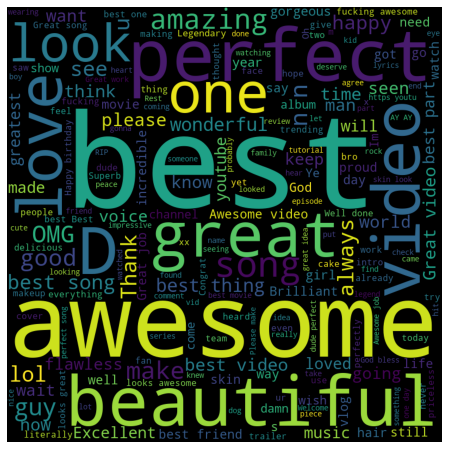

In [40]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")

In [50]:
total=' '.join(negative_df["comment_text"])

In [51]:
wordcloud=WordCloud(width=800, height=800,stopwords=stopwords).generate(total)

(-0.5, 799.5, 799.5, -0.5)

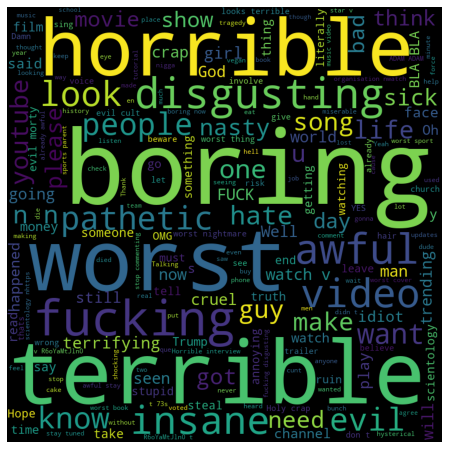

In [52]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")

In [54]:
#Analyze trending tags and viewson youtube

In [60]:
videos=pd.read_csv(r"C:\Users\LENOVO\Downloads\USvideos.csv",error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [63]:
videos.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [64]:
videos["tags"]

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [76]:
tags_complete=" ".join(videos["tags"])

In [77]:
tags_complete

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [78]:
import re

In [84]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete)
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [85]:
tags=re.sub(' +',' ',tags)

In [86]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

In [87]:
wordcloud=WordCloud(width=800,height=800,stopwords=stopwords).generate(tags)

(-0.5, 799.5, 799.5, -0.5)

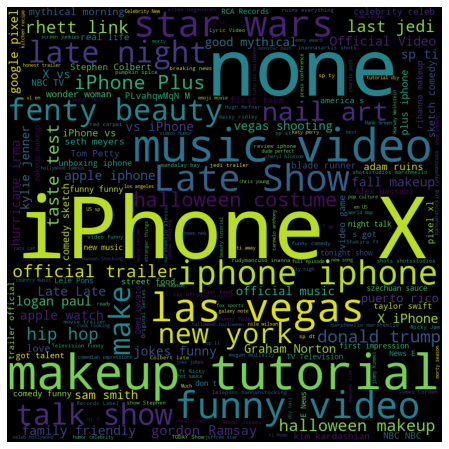

In [88]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")

<AxesSubplot:xlabel='views', ylabel='likes'>

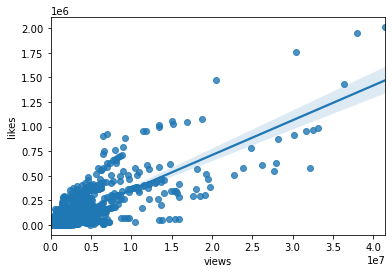

In [89]:
sns.regplot(data=videos,x="views",y="likes")
sns.title("regression between ")

<AxesSubplot:xlabel='views', ylabel='dislikes'>

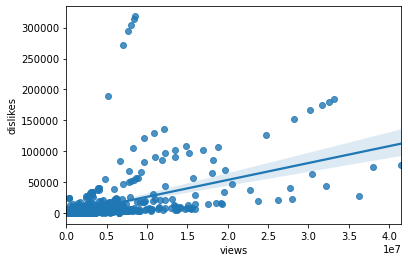

In [90]:
sns.regplot(data=videos,x="views",y="dislikes")

In [92]:
videos_correlation=videos.corr()
videos_correlation

category_id     views     likes  dislikes  comment_total  \
category_id       1.000000 -0.037362 -0.059132  0.001107      -0.020860   
views            -0.037362  1.000000  0.832844  0.541955       0.715557   
likes            -0.059132  0.832844  1.000000  0.497439       0.836477   
dislikes          0.001107  0.541955  0.497439  1.000000       0.543983   
comment_total    -0.020860  0.715557  0.836477  0.543983       1.000000   
date              0.008000  0.031203  0.039599  0.026447       0.025100   

                   date  
category_id    0.008000  
views          0.031203  
likes          0.039599  
dislikes       0.026447  
comment_total  0.025100  
date           1.000000

<AxesSubplot:>

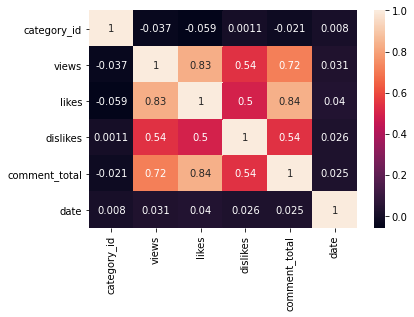

In [94]:
sns.heatmap(videos_correlation,annot=True)